### <U> D22012- BHARATH BOMMEESHWAR K

### Importing necessary libraries

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import convolve2d
from scipy import misc

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#CNN Keras
from keras.layers import Conv2D
from keras.models import Sequential, Model
import keras.backend as K

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

import tensorflow as tf
import os

In [371]:
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [372]:
from keras.callbacks import EarlyStopping

### <b> 1.Read the data (data.csv) and prepare for modelling. Split the data into Train and Test (take last one year data for  testing).

In [412]:
#read the data
data = pd.read_csv("BHARATH.BOMMEESHWAR KUMAR - data.csv")
data

,Date,Close
0,01 10 2014,434.000000
1,07 10 2014,431.225006
2,08 10 2014,433.799988
3,09 10 2014,443.799988
4,10 10 2014,433.649994
...,...,...
2098,06 04 2023,1666.349976
2099,10 04 2023,1658.449951
2100,11 04 2023,1663.300049
2101,12 04 2023,1684.900024


In [413]:
# Convert the date strings to datetime objects and set the index
data = data.set_index(pd.to_datetime(data['Date'], format='%d %m %Y'))

# Drop the original Date column
data = data.drop('Date', axis=1)

# Updated DataFrame
data

,Close
Date,
2014-10-01,434.000000
2014-10-07,431.225006
2014-10-08,433.799988
2014-10-09,443.799988
2014-10-10,433.649994
...,...
2023-04-06,1666.349976
2023-04-10,1658.449951
2023-04-11,1663.300049


In [414]:
data.tail()

,Close
Date,
2023-04-06,1666.349976
2023-04-10,1658.449951
2023-04-11,1663.300049
2023-04-12,1684.900024
2023-04-13,1692.449951


In [415]:
# Splitting last one year data for test 
split_date = pd.Timestamp('2022-04-13')
train = data.loc[:split_date, ['Close']]
test = data.loc[split_date:, ['Close']]

In [416]:
"""mm = MinMaxScaler()
trains = mm.fit_transform(train)
tests = mm.transform(test)"""

'mm = MinMaxScaler()\ntrains = mm.fit_transform(train)\ntests = mm.transform(test)'

In [417]:
train.shape, test.shape

((1856, 1), (248, 1))

In [418]:
# splitting into separate dataframe
train = pd.DataFrame(trains, columns=['Close'])
test = pd.DataFrame(tests, columns=['Close'])

* <b> Preparing the train data

In [419]:
# Creating a data structure for train data with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60,1856):
    X_train.append(train.iloc[i-60:i,0])                   
    y_train.append(train.iloc[i,0]) 

In [420]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [421]:
## Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = np.reshape(y_train, (X_train.shape[0], 1))
X_train.shape, y_train.shape

((1796, 60), (1796, 1))

* <b> Preparing the test data

In [422]:
# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []

for i in range(60,248):
    X_test.append(test.iloc[i-60:i,0])
    y_test.append(test.iloc[i,0])

In [423]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [424]:
## Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = np.reshape(y_test, (X_test.shape[0], 1))
X_test.shape, y_test.shape

((188, 60), (188, 1))

### <b> 2.     Build a model using ANN (use atleast two hidden layers). Evaluate the model on Train and Test using two metrices (rmse and r2). Plot the behaviour of loss and performance with epochs.

In [425]:
# ANN model

K.clear_session()

model = Sequential()  # initializing stack layer object

model.add(Dense(16, activation='relu',input_dim=X_train.shape[1]))  # input layer

model.add(Dense(32, activation='relu'))  # hidden layer1

model.add(Dense(32, activation='relu'))  # hidden layer2

model.add(Dense(6, activation='relu'))    # hidden layer3

model.add(Dense(1, activation='relu'))    # output layer

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                976       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 2,781
Trainable params: 2,781
Non-trainable params: 0
_________________________________________________________________


* <b> Train data

In [426]:
# fitting the compiled model to train data
model.fit(X_train, y_train, batch_size=100, epochs=50,verbose=0)  # training the model with 50 epochs

In [427]:
y_train_pred = model.predict(X_train)  # PREDICT TRAIN DATA

57/57 [==============================] - 0s 1ms/step


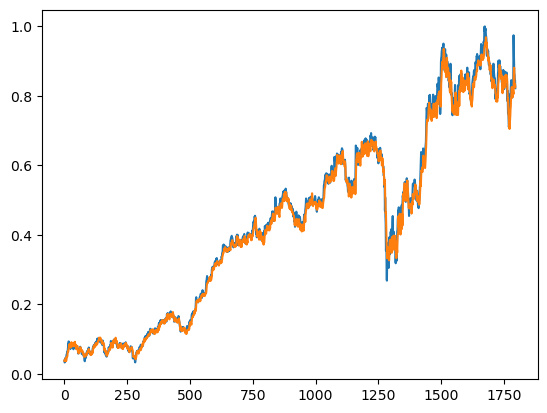

In [428]:
# Performance of the model with train data
plt.plot(y_train)
plt.plot(y_train_pred)
plt.show()

In [429]:
# rmse
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.020435170777114948

In [430]:
# r square
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
r2
# the model is overfitting the train data

0.9943964373211849

* <b> Test data

In [431]:
y_test_pred = model.predict(X_test)  # PREDICT TEST DATA

6/6 [==============================] - 0s 2ms/step


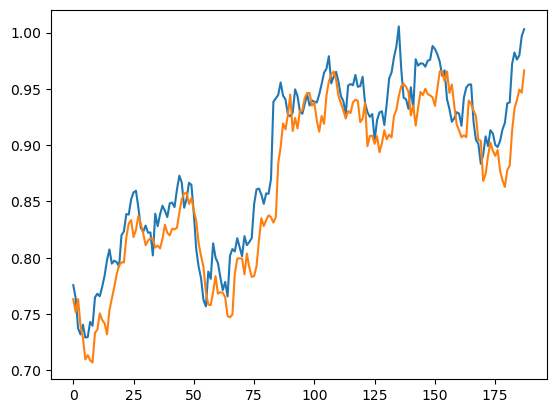

In [432]:
# Performance of the model with test data
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

In [433]:
# rmse
np.sqrt(mean_squared_error(y_test, y_test_pred))

# the rmse has rised(high variance) compared to train data performance which clearly shows overfitting of model to data

0.030628271864716266

In [434]:
# r square
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
r2
# the r2 has also dropped

0.8257591779123149

* <b> Behaviour of loss and performance

In [435]:
hist = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=0)

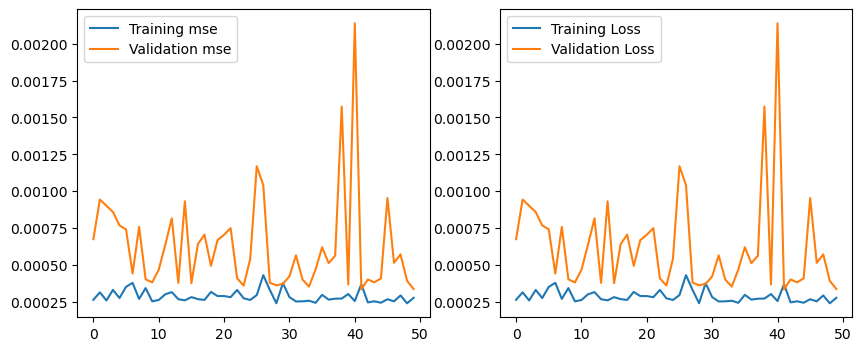

In [436]:
hist = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=0)

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
stps = len(hist.history['mse'])
plt.plot(range(stps), hist.history['mse'], label='Training mse')
plt.plot(range(stps), hist.history['val_mse'], label='Validation mse')
plt.legend()

plt.subplot(1,2,2)
stps = len(hist.history['mse'])
plt.plot(range(stps), hist.history['loss'], label='Training Loss')
plt.plot(range(stps), hist.history['val_loss'], label='Validation Loss')
plt.legend()

plt.show()

*  The train data loss is reducing gradually but the validation loss is randomly fluctuation which shows the model is overfitting to training data.

### <b> 3.     Build a model using RNN (use atleast four hidden layers). Incorporate any method to control overfitting. Evaluate the model on Test and Train using any two appropriate metrices. Explain the number of parameters.  

In [437]:
from keras.layers import LSTM

In [438]:
K.clear_session()

model1 = Sequential()

# using multiple hidden layers and drop outs to reduce overfitting

model1.add(LSTM(100, return_sequences=True, input_shape=(60,1)))
model1.add(Dropout(rate=0.2))

model1.add(LSTM(50, return_sequences=True))
model1.add(Dropout(rate=0.2))

model1.add(LSTM(50, return_sequences=True))
model1.add(Dropout(rate=0.2))

model1.add(LSTM(50, return_sequences=True))
model1.add(Dropout(rate=0.2))

model1.add(LSTM(50))
model1.add(Dropout(rate=0.2))

# The output layer
model1.add(Dense(units=1, activation='relu'))

model1.compile(optimizer='adam',loss='mean_squared_error')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            30200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            2

In [439]:
# fitting the data to lstm model
model1.fit(X_train, y_train, batch_size=32, epochs=10,verbose=1)

Epoch 1/10
57/57 [==============================] - 24s 157ms/step - loss: 0.0248
Epoch 2/10
57/57 [==============================] - 9s 161ms/step - loss: 0.0056
Epoch 3/10
57/57 [==============================] - 9s 161ms/step - loss: 0.0055
Epoch 4/10
57/57 [==============================] - 9s 166ms/step - loss: 0.0047
Epoch 5/10
57/57 [==============================] - 9s 159ms/step - loss: 0.0037
Epoch 6/10
57/57 [==============================] - 9s 154ms/step - loss: 0.0039
Epoch 7/10
57/57 [==============================] - 10s 178ms/step - loss: 0.0039
Epoch 8/10
57/57 [==============================] - 10s 180ms/step - loss: 0.0038
Epoch 9/10
57/57 [==============================] - 10s 183ms/step - loss: 0.0035
Epoch 10/10
57/57 [==============================] - 11s 196ms/step - loss: 0.0032


* <b> Train data

In [440]:
# predict train and calculating mape
y_train_pred1 = model1.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_pred1)) 

57/57 [==============================] - 7s 55ms/step


0.040224722424640126

In [441]:
# goodness of fit
r2 = r2_score(y_train, y_train_pred1)
r2

0.9782883013291752

* <b> Test data

In [442]:
# predict test and calculating mape
y_test_pred1 = model1.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_pred1))  

6/6 [==============================] - 0s 53ms/step


0.06065836099433417

In [443]:
# goodness of fit
r2 = r2_score(y_test, y_test_pred1)
r2

0.3165822291747792

In [444]:
# the performance of lstm is not good in our case this might be because of the unscaled data, the ann performed better.
# However the overfitting is reduced very well,The perfromance of the lstm can be improved with scaled data
# and increasing the number of epochs.

* <b> Explaining parameters

In [ ]:
 Layer (type)                Output Shape              Param #   
=================================================================
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            30200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        

#### Explaining (lstm (LSTM)   (None, 60, 100)    40800)

* lstm (LSTM): This is the name and type of the layer.
* (None, 60, 100): This is the shape of the output tensor from the layer
* None represents the batch size
* 60 represents the number of time steps in the input sequence, and the third dimension 100 represents the number of units (or cells) in the LSTM layer.
* 40800: This is the number of trainable parameters in the layer. It includes the weights and biases for the LSTM cells, as well as the weights and biases for the input and recurrent connections.
* the batch size is not fixed can vary at times

* input_dim x units + units x units + bias = 1 x 100 + 100 x 100 + 100 = 40800



 ####  Explianing dropout (Dropout)           (None, 60, 100)           0 

* The dropout set at a probability of 0.2 in our case. We donot have any parameters here(no weights or bias)

####  Explianing  lstm_1 (LSTM)               (None, 60, 50)            30200 

* lstm_1 (LSTM): This is the name and type of the second LSTM layer, which follows the first dropout layer.
* (None, 60, 50): This is the shape of the output tensor from the second LSTM layer. The first dimension None represents the batch size, the second dimension 60 represents the number of time steps in the input sequence
* the third dimension 50 represents the number of units in the second LSTM layer.
* 30200: This is the number of trainable parameters in the second LSTM layer.


 #### Explaining dropout_1 (Dropout)         (None, 60, 50)            0  

* dropout_1 (Dropout): This is the name and type of the second dropout layer, which follows the second LSTM layer
* (None, 60, 50): This is the shape of the output tensor from the second dropout layer. It has the same shape as the input tensor to the second dropout layer.
* 0: This is the number of trainable parameters in the second dropout layer.    

#### Explaining the output ( dense (Dense)               (None, 1)                 51 )

* dense (Dense): This is a fully connected layer with 1 unit. This is the output layer, which means that it produces the final output of the network. In this case, it outputs a single regression value.  50 (weights) + 1 (bias) = 51.